<a href="https://colab.research.google.com/github/gui98araujo/Amb_Git/blob/main/REGRESSAO_PORTIFOLIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [ ]:
fish=pd.read_csv("/content/Fish.csv")

In [ ]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
le.fit(fish['Species'])
fish['Species']=le.transform(fish['Species'])

In [ ]:
fish[['Species','Weight']].describe()

,Species,Weight
count,159.000000,159.000000
mean,2.264151,398.326415
std,1.704249,357.978317
min,0.000000,0.000000
25%,1.000000,120.000000
50%,2.000000,273.000000
75%,3.500000,650.000000
max,6.000000,1650.000000


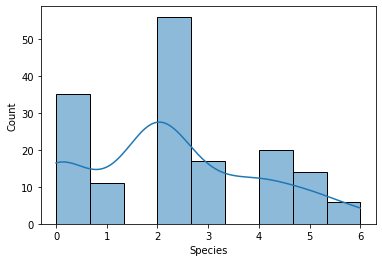

In [ ]:
sns.histplot(fish,x='Species',kde=True)

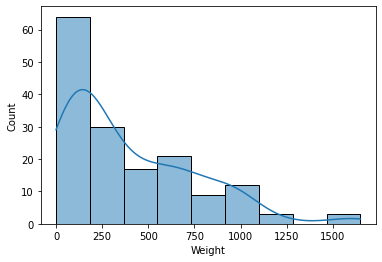

In [ ]:
sns.histplot(fish,x='Weight',kde=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
fish_norm=pd.DataFrame(scaler.fit_transform(fish),index=fish.index,columns=fish.columns)
fish_norm.describe()

,Species,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.377358,0.241410,0.364023,0.363922,0.378835,0.420382,0.475006
std,0.284042,0.216957,0.194106,0.194842,0.196119,0.248784,0.237625
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.166667,0.072727,0.224272,0.229091,0.242399,0.244733,0.329563
50%,0.333333,0.165455,0.343689,0.343636,0.347973,0.351601,0.451187
75%,0.583333,0.393939,0.489320,0.492727,0.521115,0.617433,0.639504
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    int64  
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 8.8 KB


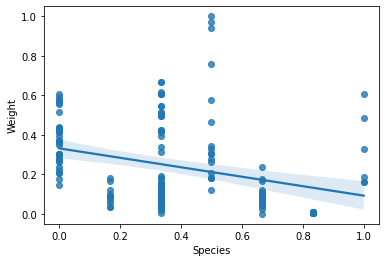

In [ ]:
sns.regplot(x='Species',y='Weight',data=fish_norm)

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
function='Weight~Species+ Length1+	Length2+	Length3	+Height+ Width'
model=smf.ols(formula=function,data=fish_norm).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     214.9
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           1.34e-71
Time:                        06:05:48   Log-Likelihood:                 196.70
No. Observations:                 159   AIC:                            -379.4
Df Residuals:                     152   BIC:                            -357.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2293      0.023     -9.931      0.0

In [ ]:
function='Weight~Species+	Length2+	Length3	+Height'
model=smf.ols(formula=function,data=fish_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     325.1
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           5.66e-74
Time:                        06:05:48   Log-Likelihood:                 196.37
No. Observations:                 159   AIC:                            -382.7
Df Residuals:                     154   BIC:                            -367.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2280      0.023     -9.981      0.0

In [ ]:
fish.corr()

,Species,Weight,Length1,Length2,Length3,Height,Width
Species,1.000000,-0.312960,-0.266696,-0.283601,-0.335519,-0.698193,-0.397578
Weight,-0.312960,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,-0.266696,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,-0.283601,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,-0.335519,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,-0.698193,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,-0.397578,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In [ ]:
x=fish_norm[['Species','Length2','Length3','Height']]
y=fish_norm[['Weight']]

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [ ]:
r_sqr=lr.score(x,y)
r_sqr

0.8941257203898545

In [ ]:
y_pred_train=lr.predict(x_train)
print('MAE: ',metrics.mean_absolute_error(y_train,y_pred_train))
print('MSE: ',metrics.mean_squared_error(y_train,y_pred_train))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))

MAE:  0.05155352514909193
MSE:  0.005007357184262586
RMSE:  0.07076268214435194


In [ ]:
y_pred_test=lr.predict(x_test)
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred_test))
print('MSE: ',metrics.mean_squared_error(y_test,y_pred_test))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

MAE:  0.05694850721162283
MSE:  0.004733170813069375
RMSE:  0.068798043671818


In [ ]:
fish_ln=fish[(fish['Weight']>0)]
fish_ln['Weight']=np.log(fish_ln['Weight'])
fish_ln

<ipython-input-158-1ac30b78d6ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fish_ln['Weight']=np.log(fish_ln['Weight'])


,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,5.488938,23.2,25.4,30.0,11.5200,4.0200
1,0,5.669881,24.0,26.3,31.2,12.4800,4.3056
2,0,5.828946,23.9,26.5,31.1,12.3778,4.6961
3,0,5.894403,26.3,29.0,33.5,12.7300,4.4555
4,0,6.063785,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,5,2.501436,11.5,12.2,13.4,2.0904,1.3936
155,5,2.595255,11.7,12.4,13.5,2.4300,1.2690
156,5,2.501436,12.1,13.0,13.8,2.2770,1.2558
157,5,2.980619,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
fish_ln.describe()

,Species,Weight,Length1,Length2,Length3,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,2.253165,5.409990,26.293038,28.465823,31.280380,8.986790,4.424232
std,1.704011,1.326166,10.011427,10.731707,11.627605,4.295191,1.689010
min,0.000000,1.774952,7.500000,8.400000,8.800000,1.728400,1.047600
25%,1.000000,4.797697,19.150000,21.000000,23.200000,5.940600,3.398650
50%,2.000000,5.639676,25.300000,27.400000,29.700000,7.789000,4.277050
75%,3.000000,6.476972,32.700000,35.750000,39.675000,12.371850,5.586750
max,6.000000,7.408531,59.000000,63.400000,68.000000,18.957000,8.142000


In [ ]:
function='Weight~Species+ Length1+	Length2+	Length3	+Height+ Width'
model=smf.ols(formula=function,data=fish_ln).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     354.6
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           2.63e-86
Time:                        06:08:15   Log-Likelihood:                -53.877
No. Observations:                 158   AIC:                             121.8
Df Residuals:                     151   BIC:                             143.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2218      0.135     16.419      0.0

In [ ]:
function='Weight~Species+ Length1+	Length2+	Length3	+ Width'
model=smf.ols(formula=function,data=fish_ln).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     428.3
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           1.21e-87
Time:                        06:08:19   Log-Likelihood:                -53.883
No. Observations:                 158   AIC:                             119.8
Df Residuals:                     152   BIC:                             138.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2170      0.126     17.530      0.0

In [ ]:
function='Weight~Species+ Length1+	Length3	+ Width'
model=smf.ols(formula=function,data=fish_ln).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     525.6
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           2.92e-88
Time:                        06:08:21   Log-Likelihood:                -55.729
No. Observations:                 158   AIC:                             121.5
Df Residuals:                     153   BIC:                             136.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2837      0.123     18.642      0.0

In [ ]:
x=fish_ln[['Species','Length1','Length3','Width']]
y=fish_ln[['Weight']]

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [ ]:
r_sqr=lr.score(x,y)
r_sqr

0.9321652588713224

In [ ]:
y_pred_train=lr.predict(x_train)
print('MAE: ',metrics.mean_absolute_error(y_train,y_pred_train))
print('MSE: ',metrics.mean_squared_error(y_train,y_pred_train))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))

MAE:  0.261084902466001
MSE:  0.11018864958765985
RMSE:  0.3319467571579211


In [ ]:
y_pred_test=lr.predict(x_test)
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred_test))
print('MSE: ',metrics.mean_squared_error(y_test,y_pred_test))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

MAE:  0.30984369738493944
MSE:  0.15145786317667917
RMSE:  0.38917587692029315


In [ ]:
import statsmodels.api as sm
fish_regressao=sm.OLS(y,x).fit()
fish_ln['Weight_prev']=fish_regressao.predict()
fish_ln

<ipython-input-168-e51b9c1c5c07>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fish_ln['Weight_prev']=fish_regressao.predict()


,Species,Weight,Length1,Length2,Length3,Height,Width,Weight_prev
0,0,5.488938,23.2,25.4,30.0,11.5200,4.0200,5.073274
1,0,5.669881,24.0,26.3,31.2,12.4800,4.3056,5.391207
2,0,5.828946,23.9,26.5,31.1,12.3778,4.6961,5.631602
3,0,5.894403,26.3,29.0,33.5,12.7300,4.4555,5.528968
4,0,6.063785,26.5,29.0,34.0,12.4440,5.1340,6.047777
...,...,...,...,...,...,...,...,...
154,5,2.501436,11.5,12.2,13.4,2.0904,1.3936,2.736641
155,5,2.595255,11.7,12.4,13.5,2.4300,1.2690,2.631922
156,5,2.501436,12.1,13.0,13.8,2.2770,1.2558,2.600227
157,5,2.980619,13.2,14.3,15.2,2.8728,2.0672,3.219017


In [ ]:
fish_ln['resíduo']=abs(fish_ln['Weight_prev']-fish_ln['Weight'])

<ipython-input-171-a6200a88745c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fish_ln['resíduo']=abs(fish_ln['Weight_prev']-fish_ln['Weight'])


In [ ]:
fish_ln

,Species,Weight,Length1,Length2,Length3,Height,Width,Weight_prev,resíduo
0,0,5.488938,23.2,25.4,30.0,11.5200,4.0200,5.073274,0.415664
1,0,5.669881,24.0,26.3,31.2,12.4800,4.3056,5.391207,0.278674
2,0,5.828946,23.9,26.5,31.1,12.3778,4.6961,5.631602,0.197344
3,0,5.894403,26.3,29.0,33.5,12.7300,4.4555,5.528968,0.365434
4,0,6.063785,26.5,29.0,34.0,12.4440,5.1340,6.047777,0.016008
...,...,...,...,...,...,...,...,...,...
154,5,2.501436,11.5,12.2,13.4,2.0904,1.3936,2.736641,0.235205
155,5,2.595255,11.7,12.4,13.5,2.4300,1.2690,2.631922,0.036667
156,5,2.501436,12.1,13.0,13.8,2.2770,1.2558,2.600227,0.098791
157,5,2.980619,13.2,14.3,15.2,2.8728,2.0672,3.219017,0.238399


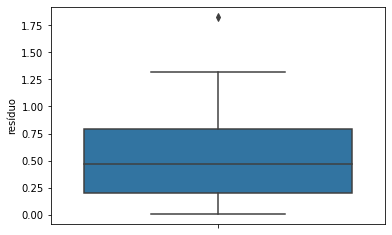

In [ ]:
sns.boxplot(data=fish_ln, y=fish_ln['resíduo'])

In [ ]:
fish_sqrt=fish
fish_sqrt['Weight']=np.sqrt(fish_sqrt['Weight'])
fish_sqrt

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,15.556349,23.2,25.4,30.0,11.5200,4.0200
1,0,17.029386,24.0,26.3,31.2,12.4800,4.3056
2,0,18.439089,23.9,26.5,31.1,12.3778,4.6961
3,0,19.052559,26.3,29.0,33.5,12.7300,4.4555
4,0,20.736441,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,5,3.492850,11.5,12.2,13.4,2.0904,1.3936
155,5,3.660601,11.7,12.4,13.5,2.4300,1.2690
156,5,3.492850,12.1,13.0,13.8,2.2770,1.2558
157,5,4.438468,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
function='Weight~Species+ Length1+	Length2+	Length3	+Height+ Width'
model=smf.ols(formula=function,data=fish_sqrt).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     976.3
Date:                Thu, 01 Dec 2022   Prob (F-statistic):          1.21e-118
Time:                        07:25:51   Log-Likelihood:                -285.94
No. Observations:                 159   AIC:                             585.9
Df Residuals:                     152   BIC:                             607.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.9267      0.581    -13.642      0.0

In [ ]:
function='Weight~Species+ Length1+	Length3	+Height+ Width'
model=smf.ols(formula=function,data=fish_sqrt).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1172.
Date:                Thu, 01 Dec 2022   Prob (F-statistic):          5.33e-120
Time:                        07:26:20   Log-Likelihood:                -286.42
No. Observations:                 159   AIC:                             584.8
Df Residuals:                     153   BIC:                             603.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.7304      0.544    -14.212      0.0

In [ ]:
x=fish_sqrt[['Species','Length1','Length3','Height','Width']]
y=fish_sqrt[['Weight']]

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [ ]:
r_sqr=lr.score(x,y)
r_sqr

0.9745531712423532

In [ ]:
y_pred_train=lr.predict(x_train)
print('MAE: ',metrics.mean_absolute_error(y_train,y_pred_train))
print('MSE: ',metrics.mean_squared_error(y_train,y_pred_train))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))


MAE:  0.9166428856813765
MSE:  2.3959645334308464
RMSE:  1.5478903492918503


In [ ]:
fish_cbrt=fish
fish_cbrt['Weight']=np.cbrt(fish_cbrt['Weight'])
fish_cbrt

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,6.231680,23.2,25.4,30.0,11.5200,4.0200
1,0,6.619106,24.0,26.3,31.2,12.4800,4.3056
2,0,6.979532,23.9,26.5,31.1,12.3778,4.6961
3,0,7.133492,26.3,29.0,33.5,12.7300,4.4555
4,0,7.547842,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,5,2.302078,11.5,12.2,13.4,2.0904,1.3936
155,5,2.375208,11.7,12.4,13.5,2.4300,1.2690
156,5,2.302078,12.1,13.0,13.8,2.2770,1.2558
157,5,2.700777,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
function='Weight~Species+ Length1+	Length2+	Length3	+Height+ Width'
model=smf.ols(formula=function,data=fish_cbrt).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     747.4
Date:                Fri, 02 Dec 2022   Prob (F-statistic):          4.35e-110
Time:                        05:45:51   Log-Likelihood:                -96.823
No. Observations:                 159   AIC:                             207.6
Df Residuals:                     152   BIC:                             229.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0091      0.177      0.052      0.9

In [ ]:
function='Weight~Species+	Length2+	Length3	+Height+ Width'
model=smf.ols(formula=function,data=fish_cbrt).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     902.8
Date:                Fri, 02 Dec 2022   Prob (F-statistic):          1.38e-111
Time:                        05:46:18   Log-Likelihood:                -96.824
No. Observations:                 159   AIC:                             205.6
Df Residuals:                     153   BIC:                             224.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0116      0.167      0.069      0.9

In [ ]:
function='Weight~Species+	Length2+	Length3	+Height+ Width-1'
model=smf.ols(formula=function,data=fish_cbrt).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Weight   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              7603.
Date:                Fri, 02 Dec 2022   Prob (F-statistic):                   2.29e-182
Time:                        05:46:29   Log-Likelihood:                         -96.826
No. Observations:                 159   AIC:                                      203.7
Df Residuals:                     154   BIC:                                      219.0
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
function='Weight~	Length2+	Length3	+Height+ Width-1'
model=smf.ols(formula=function,data=fish_cbrt).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Weight   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              9566.
Date:                Fri, 02 Dec 2022   Prob (F-statistic):                   2.20e-184
Time:                        05:46:44   Log-Likelihood:                         -96.827
No. Observations:                 159   AIC:                                      201.7
Df Residuals:                     155   BIC:                                      213.9
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
function='Weight~	Length2	+Height+ Width-1'
model=smf.ols(formula=function,data=fish_cbrt).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Weight   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          1.275e+04
Date:                Fri, 02 Dec 2022   Prob (F-statistic):                   2.93e-186
Time:                        05:47:05   Log-Likelihood:                         -97.334
No. Observations:                 159   AIC:                                      200.7
Df Residuals:                     156   BIC:                                      209.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
x=fish_cbrt[['Length2',	'Height','Width']]
y=fish_cbrt[['Weight']]

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [ ]:
r_sqr=lr.score(x,y)
r_sqr

0.9670109070148926

In [ ]:
y_pred_train=lr.predict(x_train)
print('MAE: ',metrics.mean_absolute_error(y_train,y_pred_train))
print('MSE: ',metrics.mean_squared_error(y_train,y_pred_train))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))

MAE:  0.19939875901365858
MSE:  0.2313709420531752
RMSE:  0.4810103346635862
